In [22]:
from keras.models import Sequential
from keras.layers import Dense, Activation
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import r2_score,confusion_matrix,classification_report
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import median_absolute_error as meae
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
import seaborn as sn
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score, f1_score, confusion_matrix,mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [23]:
nyc_data = pd.read_csv('nyc_featureselected.csv')
nyc_data.head()

,host_id,neighbourhood,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price
0,2787,108,1,1,9,0.21,6,365,5.010635
1,2845,127,0,1,45,0.38,2,355,5.420535
2,4632,94,1,3,0,0.00,1,365,5.017280
3,4869,41,0,1,270,4.64,1,194,4.499810
4,7192,61,0,10,9,0.10,1,0,4.394449


In [24]:
nyc_data_1 = nyc_data.copy()
nyc_data_1 = nyc_data.drop('price',axis=1)
X = nyc_data_1
y = nyc_data["price"]

In [25]:
print(X.shape)
print(X.dtypes)

(48895, 8)
host_id                             int64
neighbourhood                       int64
room_type                           int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


In [26]:
print(y.shape)
print(y.dtypes)

(48895,)
float64


In [27]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [28]:
x_train = preprocessing.MinMaxScaler().fit_transform(x_train)
x_test = preprocessing.MinMaxScaler().fit_transform(x_test)

In [29]:
nyc_data.shape

(48895, 9)

In [30]:
# to build the model
model = Sequential()
model.add(Dense(32, input_dim=784))
model.add(Activation('relu'))

In [31]:
def metrics_table(model, x_test, y_test,x_train,y_train):

    print('\nTrain data')

    ypred_train = model.predict(x_train)

    mse = mean_squared_error(y_train, ypred_train)
    print("MSE_train: %.3f" % mse)

    mse_train = mean_squared_error(y_train, ypred_train)
    print('RMSE_train: ', round(np.sqrt(mse_train), 3))

    mae_train = mean_absolute_error(y_train, ypred_train)
    print('MAE_train: ', round(mae_train, 3))

    r2_Test = r2_score(y_train, ypred_train, multioutput='variance_weighted')
    print("R2_train: ",round(r2_Test,3))

    print('\nTest data')

    ypred_test = model.predict(x_test)

    mse = mean_squared_error(y_test, ypred_test)
    print("MSE_test: %.3f" % mse)

    mse_Test = mean_squared_error(y_test, ypred_test)  
    print('RMSE_test: ', round(np.sqrt(mse_Test),3))

    mae_Test = mean_absolute_error(y_test, ypred_test)
    print('MAE_test: ', round(mae_Test, 3))

    r2_Test = r2_score(y_test, ypred_test, multioutput='variance_weighted')
    print("R2: ",round(r2_Test,3))

In [40]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

In [41]:
model = Sequential()

Dense(64) is a fully-connected layer with 64 hidden units. in the first layer, So we must specify the expected input data shape in the first layer which is 
20-dimensional vectors.

In [42]:
model.add(Dense(20, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(40, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='linear'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9 )
model.compile(loss = 'mean_squared_error', optimizer= "adam", metrics =['accuracy'])
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 20)                180       
                                                                 
 dense_33 (Dense)            (None, 40)                840       
                                                                 
 dense_34 (Dense)            (None, 20)                820       
                                                                 
 dense_35 (Dense)            (None, 25)                525       
                                                                 
 dense_36 (Dense)            (None, 1)                 26        
                                                                 
Total params: 2,391
Trainable params: 2,391
Non-trainable params: 0
_________________________________________________________________
None


In [43]:
model.fit(x_train, y_train, epochs = 100, batch_size = 100, validation_split = 0.1)
score = model.evaluate(x_test, y_test, batch_size = 150)
print(score)

Epoch 1/100
353/353 [==============================] - 1s 2ms/step - loss: 2.9615 - accuracy: 0.0000e+00 - val_loss: 0.2895 - val_accuracy: 0.0000e+00
Epoch 2/100
353/353 [==============================] - 1s 2ms/step - loss: 0.2968 - accuracy: 0.0000e+00 - val_loss: 0.2772 - val_accuracy: 0.0000e+00
Epoch 3/100
353/353 [==============================] - 1s 2ms/step - loss: 0.2893 - accuracy: 0.0000e+00 - val_loss: 0.2696 - val_accuracy: 0.0000e+00
Epoch 4/100
353/353 [==============================] - 1s 2ms/step - loss: 0.2852 - accuracy: 0.0000e+00 - val_loss: 0.2700 - val_accuracy: 0.0000e+00
Epoch 5/100
353/353 [==============================] - 1s 2ms/step - loss: 0.2832 - accuracy: 0.0000e+00 - val_loss: 0.2702 - val_accuracy: 0.0000e+00
Epoch 6/100
353/353 [==============================] - 1s 2ms/step - loss: 0.2821 - accuracy: 0.0000e+00 - val_loss: 0.2658 - val_accuracy: 0.0000e+00
Epoch 7/100
353/353 [==============================] - 1s 2ms/step - loss: 0.2819 - accuracy: 

Epoch 55/100
353/353 [==============================] - 0s 1ms/step - loss: 0.2676 - accuracy: 0.0000e+00 - val_loss: 0.2516 - val_accuracy: 0.0000e+00
Epoch 56/100
353/353 [==============================] - 1s 2ms/step - loss: 0.2674 - accuracy: 0.0000e+00 - val_loss: 0.2536 - val_accuracy: 0.0000e+00
Epoch 57/100
353/353 [==============================] - 1s 2ms/step - loss: 0.2677 - accuracy: 0.0000e+00 - val_loss: 0.2581 - val_accuracy: 0.0000e+00
Epoch 58/100
353/353 [==============================] - 1s 2ms/step - loss: 0.2673 - accuracy: 0.0000e+00 - val_loss: 0.2521 - val_accuracy: 0.0000e+00
Epoch 59/100
353/353 [==============================] - 1s 2ms/step - loss: 0.2684 - accuracy: 0.0000e+00 - val_loss: 0.2523 - val_accuracy: 0.0000e+00
Epoch 60/100
353/353 [==============================] - 1s 2ms/step - loss: 0.2672 - accuracy: 0.0000e+00 - val_loss: 0.2791 - val_accuracy: 0.0000e+00
Epoch 61/100
353/353 [==============================] - 1s 2ms/step - loss: 0.2682 - acc

In [46]:
# Scatterplot of predicted vs. actual values
def plot():
    yPred = model.predict(x_test)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    fig.suptitle('Predicted vs. actual values', fontsize=14, y=1)
    
    ax1.scatter(y_test, y_test_pred, s=2)
    ax1.plot(list(range(2,8)), list(range(2,8)), color='red', linestyle='--')
    ax1.set_title('Test set')
    ax1.set_xlabel('Actual values')
    ax1.set_ylabel('Predicted values')
    
    ax2.scatter(y_train, y_train_pred, s=2)
    ax2.plot(list(range(2,8)), list(range(2,8)), color='red', linestyle='--')
    ax2.set_title('Train set')
    ax2.set_xlabel('Actual values')
    ax2.set_ylabel('')
    ax2.set_yticklabels(labels='')
    
    plt.show()


Train data
1223/1223 [==============================] - 1s 1ms/step
MSE_train: 0.258
RMSE_train:  0.508
MAE_train:  0.372
R2_train:  0.468

Test data
306/306 [==============================] - 0s 1ms/step
MSE_test: 0.262
RMSE_test:  0.512
MAE_test:  0.373
R2:  0.453
306/306 [==============================] - 0s 1ms/step


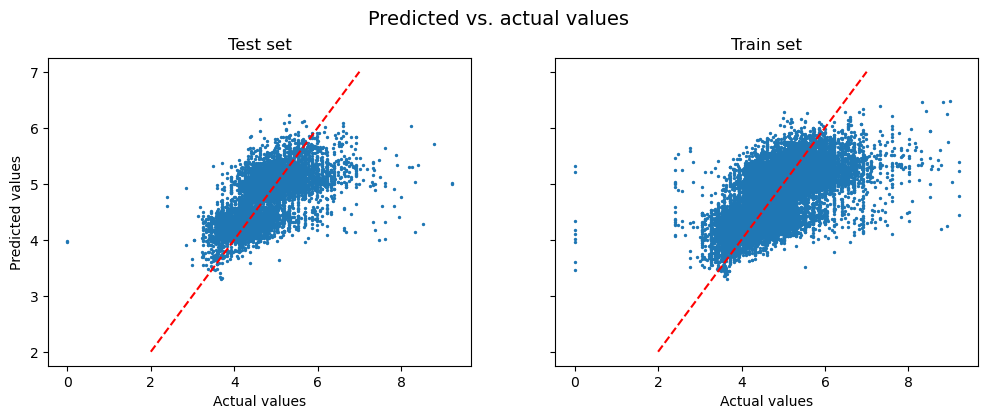

In [47]:
metrics_table(model,x_test,y_test,x_train,y_train)
y_test_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)
plot()